# W207 Final Project : Facial Keypoint Detection 
# Team: Joanie Weaver, Sandip Panesar, Jackie Nichols, Rakesh Walisheter
W207 Tuesday @4pm

ref: https://www.kaggle.com/c/facial-keypoints-detection

In [9]:
cd /content/drive/My Drive/w207/blackboxes

/content/drive/My Drive/w207/blackboxes


## Imports

In [10]:
UTILS_PATH = "utils/"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
from transform_data import TransformData

import pandas as pd
import numpy as np
import warnings

from tqdm import tqdm
import zlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pickle
import altair as alt 
from  sklearn.linear_model import LinearRegression

# EDA

For our EDA approach we will initially consider the following areas all of which are covered in this notebook: 

EDA

1. LOAD DATA - load data and become familiar with the structure and contents
2. DUPLICATES - identify, and potential approach for handling
3. MISSING DATA -identify, and potential approach for handling
4. OUTLIERS - identify, and potential approach for handling 

## 1. LOAD DATA For EDA
There are 4 files found in the data directory:

- IdLookupTable - feature mapping to images
- SampleSubmission - sample submission for the contest
- test - test data of image
- training - image training data with points 

We must load this data in order to perform EDA. 




In [11]:

#https://realpython.com/python-zip-function/#:~:text=%20Using%20the%20Python%20zip%20()%20Function%20for,zip%20()%20function%20works%20differently%20in...%20More

df, git_path = {}, 'data/'
for file_name, file_ref, n, t in zip(['test.csv', 'training.csv', 'IdLookupTable.csv', 'SampleSubmission.csv'],
                        ['test', 'train', 'id_lookup', 'sample_submission', ],
                        [   #test
                            ['image_id', 'image'], 
                            #train
                            ['left_eye_center_x', 'left_eye_center_y',  
                            'right_eye_center_x', 'right_eye_center_y', 
                            'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 
                            'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 
                            'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 
                            'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 
                            'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 
                            'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 
                            'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 
                            'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 
                            'nose_tip_x', 'nose_tip_y', 
                            'mouth_left_corner_x', 'mouth_left_corner_y', 
                            'mouth_right_corner_x', 'mouth_right_corner_y', 
                            'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 
                            'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
                            #IdLookupTable
                            ['row_id', 'image_id', 'feature_name', 'location'],
                            #SampleSubmission
                            ['row_id', 'location']
                        ],

                        [
                             #test   
                            {'image_id':'uint16', 'image':'object'},
                            #train
                            {'left_eye_center_x':'float32', 'left_eye_center_y':'float32', 
                            'right_eye_center_x':'float32', 'right_eye_center_y':'float32', 
                            'left_eye_inner_corner_x':'float32', 'left_eye_inner_corner_y':'float32', 
                            'left_eye_outer_corner_x':'float32', 'left_eye_outer_corner_y':'float32', 
                            'right_eye_inner_corner_x':'float32', 'right_eye_inner_corner_y':'float32',
                            'right_eye_outer_corner_x':'float32', 'right_eye_outer_corner_y':'float32', 
                            'left_eyebrow_inner_end_x':'float32', 'left_eyebrow_inner_end_y':'float32',
                            'left_eyebrow_outer_end_x':'float32', 'left_eyebrow_outer_end_y':'float32', 
                            'right_eyebrow_inner_end_x':'float32', 'right_eyebrow_inner_end_y':'float32',
                            'right_eyebrow_outer_end_x':'float32', 'right_eyebrow_outer_end_y':'float32', 
                            'nose_tip_x':'float32', 'nose_tip_y':'float32', 'mouth_left_corner_x':'float32',
                            'mouth_left_corner_y':'float32', 'mouth_right_corner_x':'float32', 
                            'mouth_right_corner_y':'float32', 'mouth_center_top_lip_x':'float32', 
                            'mouth_center_top_lip_y':'float32','mouth_center_bottom_lip_x':'float32', 
                            'mouth_center_bottom_lip_y':'float32', 'image':'object'},
                             #IdLookupTable
                            {'row_id':'uint16', 'image_id':'uint16', 'location':'float32'},
                            #SampleSubmission
                            {'row_id':'uint16', 'location':'float32'}
                        ],
                        ):
    #This is the begining of the for loop for each file:
    print("Load files.")
    print("Begin loading file '%s' " % "".join( (git_path, file_name)))
    #print(file_ref)
    df[file_ref] = pd.read_csv("".join( (git_path,file_name) ), names = n, dtype = t, skiprows = 1)
    
    #If the file contains an image column like in the case of test.csv store those images now. 
    if "image" in df[file_ref]:
        print("\tFound %d images. Processing. " % df[file_ref].shape[0])
        #Get the row with the image data and store it in the dataframe 
        df[file_ref]['image'] = df[file_ref]["image"].map(lambda x: np.array(list(map(int, x.split(" ")))))
    print("\tFile", file_ref, " with shape:", df[file_ref].shape, " load complete\n")

print("Load files complete")

Load files.
Begin loading file 'data/test.csv' 
	Found 1783 images. Processing. 
	File test  with shape: (1783, 2)  load complete

Load files.
Begin loading file 'data/training.csv' 
	Found 7049 images. Processing. 
	File train  with shape: (7049, 31)  load complete

Load files.
Begin loading file 'data/IdLookupTable.csv' 
	File id_lookup  with shape: (27124, 4)  load complete

Load files.
Begin loading file 'data/SampleSubmission.csv' 
	File sample_submission  with shape: (27124, 2)  load complete

Load files complete


In [12]:
train, test = df['train'][['image']], df['test'][['image']]


### Helper Plotting Code

- print_train_stacked(text = True) - Plot the data that makes up the train dataset: duplicate + unique duplicate + remaing train dataset
- print_test_stacked(text = True) - Plot the data that makes up the train dataset: duplicate + unique duplicate + remaing train dataset
- print_duplicate_info(name) - Print out the duplicate % and plot for either name=='train' or name=='test'

In [13]:
def print_train_stacked():
    train_size = train.shape[0] - train_duplicates.shape[0]
    train_dup_unique = len(np.unique(train_duplicates.check_sum))
    train_dup = train_duplicates.shape[0] - train_dup_unique

    data = {'Size': [train_size, train_dup, train_dup_unique],
            'Portion': ["Train", "Duplicates", "Unique Duplicates"] }
    mydf = pd.DataFrame(data, columns = ["Size", "Portion"])


    bars = alt.Chart(mydf).mark_bar().encode(
        x=alt.X('Size:Q', axis=alt.Axis(title='Count')),
        y=alt.Y('Portion:N', axis=alt.Axis(title='Portion of DS')),
        detail='Portion:N',
        color=alt.Color('Portion', legend=None)
    ).properties(width=500, height=100)\
    .properties(title = 'Train Dataset Broken Down into Buckets')
    

    text = alt.Chart(mydf).mark_text(dx=20, dy=3, color='black').encode(
    x=alt.X('sum(Size):Q', stack='zero'),
        y=alt.Y('Portion:N'),
        detail='Portion:N',
        text=alt.Text('sum(Size):Q', format='.1f')
    )

    return bars + text

def print_test_stacked():
    test_size = test.shape[0] - test_duplicates.shape[0]
    test_dup_unique = len(np.unique(test_duplicates.check_sum))
    test_dup = test_duplicates.shape[0] - test_dup_unique

    data = {'Size': [test_size, test_dup, test_dup_unique],
            'Portion': ["Test", "Duplicates", "Unique Duplicates"] }
    mydf = pd.DataFrame(data, columns = ["Size", "Portion"])


    bars2 = alt.Chart(mydf).mark_bar().encode(
        x=alt.X('Size:Q', axis=alt.Axis(title="Count")),
        y=alt.Y('Portion:N', axis=alt.Axis(title="Portion of DS")),
        detail='Portion:N',
        color=alt.Color('Portion', legend=None)
    ).properties(width=500, height=100)\
    .properties(title = 'Test Dataset Broken Down into Buckets')
    

    text2 = alt.Chart(mydf).mark_text(dx=20, dy=3, color='black').encode(
    x=alt.X('sum(Size):Q', stack='zero'),
        y=alt.Y('Portion:N'),
        detail='Portion:N',
        text=alt.Text('sum(Size):Q', format='.1f')
    )

    return bars2 + text2


def print_duplicate_info(name):
    if name == 'test':
        mydf = reset_test_df()
        print(f"{test.shape[0]/test_duplicates.shape[0]:.2f} % of test data is duplicates")
        return print_test_stacked()
    else:
        mydf = reset_test_df()
        print(f"{train.shape[0]/train_duplicates.shape[0]:.2f} % of train data is duplicates")
        return print_train_stacked()

### Helper Code for DFs

- reset_train_df() - reset the train ds index
- reset_test_df() - reset the test ds index
- get_coordiante_columns() - return a list of columns that end in _x, or _y


In [14]:
#HELPER FUNCTIONS to reset the train and test dataframes

def reset_train_df():
    train = df['train'].reset_index().copy()
    #Get the images and perform a checksum on every image in train: https://www.geeksforgeeks.org/zlib-adler32-in-python/
    train['check_sum'] = train.image.map(lambda x: zlib.adler32(x))

    return train

def reset_test_df():
    test = df['test'].reset_index().copy()
    #Get the images and perform a checksum on every image in train: https://www.geeksforgeeks.org/zlib-adler32-in-python/
    test['check_sum'] = test.image.map(lambda x: zlib.adler32(x))

    return test

def get_coordinate_columns():
    coordinates = [c for c in train.columns if c.endswith('_x') | c.endswith('_y')]
    return coordinates

# 2. DUPLICATES
## Check Train and Test DS for Duplicates

In [15]:

# Check for duplicate train images

#Get the reset train df
train = reset_train_df()
#Create a DF to store duplicates, grouping them together and sorting them
train_duplicates = pd.DataFrame(train.groupby(by='check_sum').index.count().sort_values()).reset_index()
#Add a column to keep track of how many of each check sum there are
train_duplicates.columns = ['check_sum', 'number_found']
#Keep the ones where we have > 1 number_found
train_duplicates = train_duplicates[(train_duplicates.number_found > 1)]
#Now do a left outer join back to train_duplicates.  This should only keep the duplicates 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#:~:text=merge%20is%20a%20function%20in%20the%20pandas%20namespace,,the%20index-on-index%20(by%20default)%20and%20column%20(s)-on-index%20join.
train_duplicates = pd.merge(train_duplicates, train[['index', 'check_sum']],  how = 'left', on=['check_sum']).sort_values(by=['number_found', 'check_sum'], ascending = False)


#Now do the same for test:
# Check for duplicate train images
test = reset_test_df()
#Create a DF to store duplicates, grouping them together and sorting them
test_duplicates = pd.DataFrame(test.groupby(by='check_sum').index.count().sort_values()).reset_index()
#Add a column to keep track of how many of each check sum there are
test_duplicates.columns = ['check_sum', 'number_found']
#Keep the ones where we have > 1 number_found
test_duplicates = test_duplicates[(test_duplicates.number_found > 1)]
#Now do a left outer join back to train_duplicates.  This should only keep the duplicates 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#:~:text=merge%20is%20a%20function%20in%20the%20pandas%20namespace,,the%20index-on-index%20(by%20default)%20and%20column%20(s)-on-index%20join.
test_duplicates = pd.merge(test_duplicates, test[['index', 'check_sum']],  how = 'left', on=['check_sum']).sort_values(by=['number_found', 'check_sum'], ascending = False)

print("EDA on duplicate data in train and test datasets: ")
print("The train dataset has %d unique images out of the %d duplicate images from the total of %d images" % (len(np.unique(train_duplicates.check_sum)), train_duplicates.shape[0], train.shape[0]))
print("The test dataset has %d unique images out of %d duplicate images from the total of %d images" % (len(np.unique(test_duplicates.check_sum)),test_duplicates.shape[0], test.shape[0]))

#Clean up:
#We don't really need the check_sum column anymore...so drop it
train.drop(columns=['check_sum'], inplace=True)
test.drop(columns=['check_sum'], inplace=True)





EDA on duplicate data in train and test datasets: 
The train dataset has 543 unique images out of the 1098 duplicate images from the total of 7049 images
The test dataset has 29 unique images out of 60 duplicate images from the total of 1783 images


In [16]:

print_duplicate_info('test')

29.72 % of test data is duplicates


alt.LayerChart(...)

In [17]:
print_duplicate_info('train')

6.42 % of train data is duplicates


alt.LayerChart(...)

We have found duplicates in both the test and train datasets.  We will first investigate the train ds followed by the test ds

## Train Dataset and Duplicates

- Show some samples of Duplicates
- How many labels are on the duplicates?
- Show some data wtih missing labels?
- Test an approach to determine what to do if we drop the duplicates.  Which labels do we keep?

### Show Some Sample Duplicates from Train


In [18]:

def show_duplicate_train():
    ## TRAIN 
    # Let's view some of these duplicated train images
    fig = plt.figure(figsize=(18,18))
    fig.suptitle('Sample of duplicate images from the Train dataset\n n= 35', size = 20,  y = 1.04, weight = 'bold')
    #Get the point coordinates for example: mouth_center_top_lip_x
    coordinates = get_coordinate_columns()
    #print(coordinates)
    #Get the top 35 duplicate images
    idx = train_duplicates.head(35)['index'].values
    #For testing, these are the duplicate ID's
    #print(idx)

    match_pts = pd.DataFrame(columns =['Points_Found', 'Count'])

    #Loop through and plot each of the 35 images.  
    for i, idx in enumerate(idx):
        plt.subplot(7,5,i+1)
        img = train[(train['index'] == idx)].image.values[0].reshape(96,96)
        #These are the points that have been identified on the images
        points = train[(train['index'] == idx)][coordinates].values[0]
        plt.imshow(img, cmap = 'gray')
        plt.axis('off')
        matching_pts = 0

        for pts in range(0, 30, 2):
            x_point, y_point = (points[pts], points[pts+1])
            if not (np.isnan(x_point)) and not (np.isnan(y_point)):
                matching_pts += 1
                #Add the point to the plot
                plt.plot(x_point, y_point, 'o', color = "red", markersize = 5)

        plt.title("Image #:[%d]\n#Points:[%d]" % (idx, matching_pts))
        if matching_pts in match_pts["Points_Found"].values:
                match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] = match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] + 1
        else:
            match_pts = match_pts.append({'Points_Found':matching_pts,'Count': 1},ignore_index=True)


    plt.tight_layout()
    plt.show()

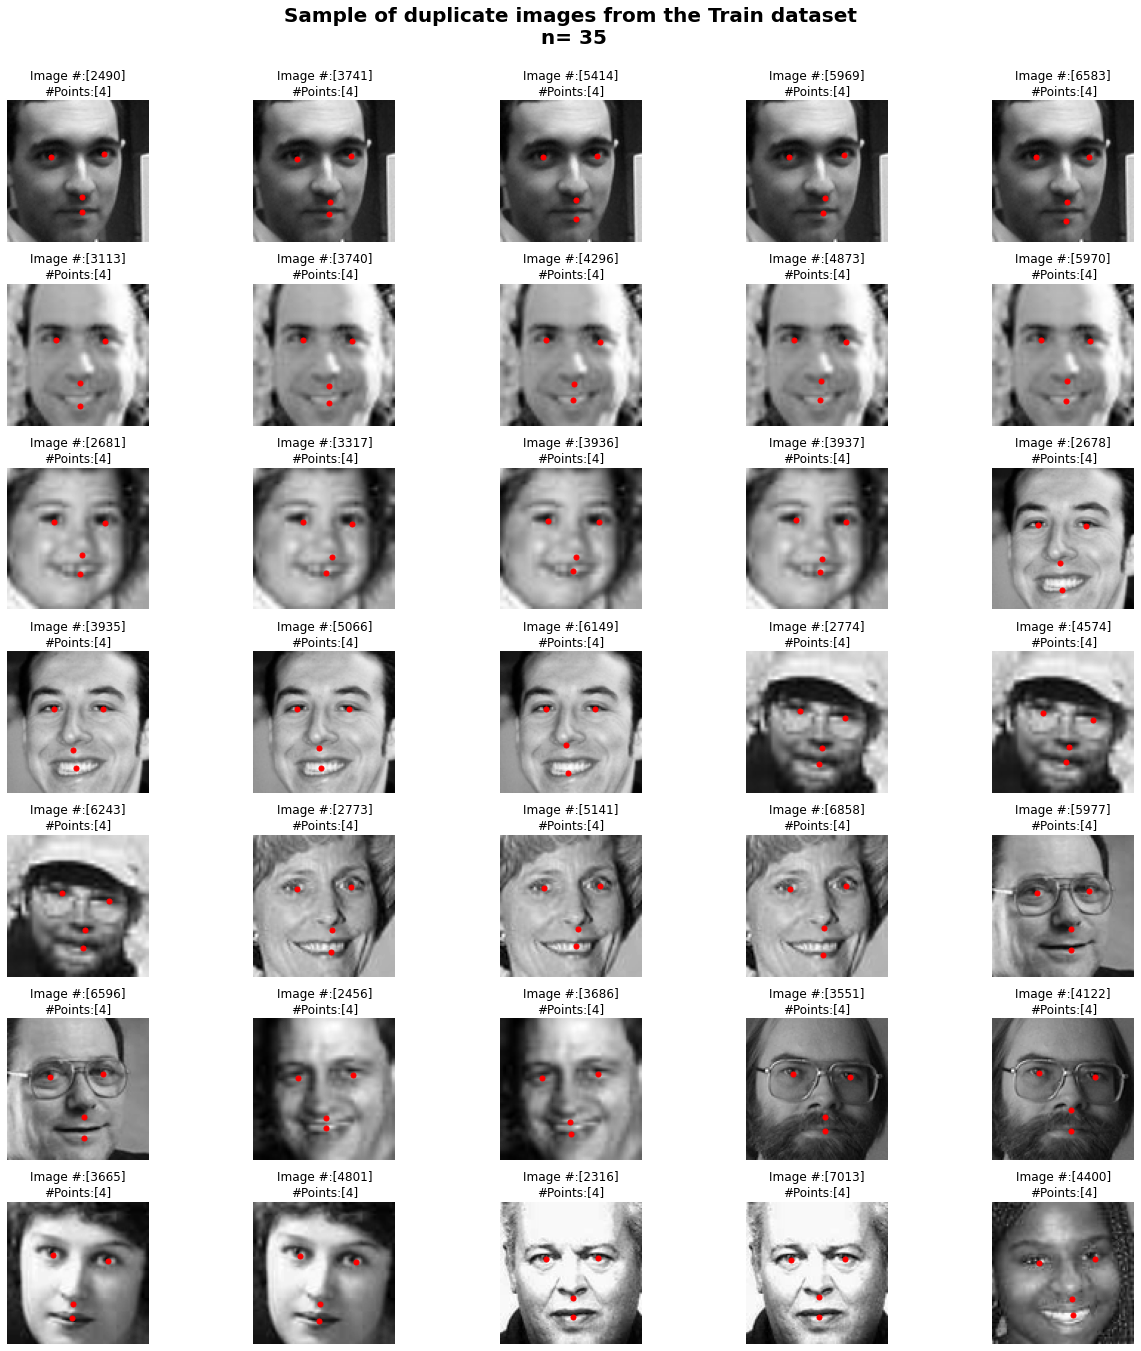

In [19]:
show_duplicate_train()

### How Many Labels are on the Duplicates from Test?

In [20]:
def show_npoints_duplicates():
    idx = train_duplicates['index'].values
    #For testing, these are the duplicate ID's
    
    match_pts = pd.DataFrame(columns =['Points_Found', 'Count'])
    coordinates = get_coordinate_columns()
    #Loop through and plot each of the 35 images.  
    for i, idx in enumerate(idx):
        img = train[(train['index'] == idx)].image.values[0].reshape(96,96)
        #These are the points that have been identified on the images
        points = train[(train['index'] == idx)][coordinates].values[0]
        matching_pts = 0

        for pts in range(0, 30, 2):
            x_point, y_point = (points[pts], points[pts+1])
            if not (np.isnan(x_point)) and not (np.isnan(y_point)):
                matching_pts += 1
                
        if matching_pts in match_pts["Points_Found"].values:
                match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] = match_pts.loc[match_pts['Points_Found'] == matching_pts, 'Count'] + 1
                
        else:
            match_pts = match_pts.append({'Points_Found': matching_pts,'Count': 1},ignore_index=True)
            
    #print(match_pts)

    bars2 = alt.Chart(match_pts).mark_bar().encode(
    x=alt.X('Count:Q',axis=alt.Axis(title='Number of Occurrences')),
    y=alt.Y('Points_Found:N', axis=alt.Axis(title='Number of Points')),
    detail='Points_Found:N',
    color=alt.Color('Points_Found', legend=None)
    ).properties(width=500, height=100)\
    .properties(title = 'Test Dataset Broken Down into Buckets')


    text2 = alt.Chart(match_pts).mark_text(dx=20, dy=3, color='black').encode(
    x=alt.X('sum(Count):Q', stack='zero'),
        y=alt.Y('Points_Found:N'),
        detail='Points_Found:N',
        text=alt.Text('sum(Count):Q', format='.1f')
    )

    return bars2 + text2


In [21]:
show_npoints_duplicates()

alt.LayerChart(...)

### An example of the Labels in Duplicates from Train


In [22]:
def test_duplicate_labels():
    #Do the duplicate Train images have the same labels? Let's test one out. 

    #Get only the first images checksum from duplicate train and then get the images that match the check_sum
    duplicate_image_chksum = train_duplicates.iloc[0, train_duplicates.columns.get_loc('check_sum')] 

    duplicate_image_index = train_duplicates.loc[(train_duplicates.check_sum == duplicate_image_chksum)]['index'].values

    #Create an array of all of the coumns with x,y in them
    coordinate_columns = get_coordinate_columns()

    #Get the df so we can display something meaningful
    duplicate_image_df = train.loc[(train['index'].isin(duplicate_image_index))][coordinate_columns]

    #https://mode.com/example-gallery/python_dataframe_styling/
    return duplicate_image_df.style\
        .highlight_max(subset=coordinate_columns,color='green')\
        .set_na_rep("N/A").format(None, na_rep="Missing")\
        .highlight_null('yellow')

In [23]:
test_duplicate_labels()

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1409: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1409: RuntimeWarning: All-NaN slice encountered
  extrema = data == np.nanmax(data.to_numpy())


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
2490,65.334175,35.471878,29.366461,37.767685,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,50.411373,64.934769,Missing,Missing,Missing,Missing,Missing,Missing,50.028778,74.883240
3741,65.446320,37.164719,29.093319,39.233547,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.555363,68.197731,Missing,Missing,Missing,Missing,Missing,Missing,50.964199,76.177589
5414,65.501717,36.826946,28.705406,37.491913,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.315178,67.194923,Missing,Missing,Missing,Missing,Missing,Missing,51.093525,79.608154
5969,65.636299,36.285984,28.892820,38.154251,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,52.869461,65.867554,Missing,Missing,Missing,Missing,Missing,Missing,51.312550,75.831932
6583,65.277435,37.893036,29.051128,37.893036,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,50.183113,68.356033,Missing,Missing,Missing,Missing,Missing,Missing,49.359776,81.293228


### Test an Approach for Adjusting Labels After Removing Duplicates from Train

In [24]:
def test_adjust_labels():

    #The lables do not match exactly in the duplicate Train images.  The challenge would be to determine which of the images to keep if we      remove all but one of the duplicate images. We have two options:

    #1 - Keep the first duplicate and disregard the others - Easy to do, low cost but we risk losing data.
    #2 - Take the average for all coordiantes across the duplicate image and apply those coordinates moving forward. A little more work         invovled and risk of introducing more errors to the lables. 
    duplicate_image_chksum = train_duplicates.iloc[0, train_duplicates.columns.get_loc('check_sum')] 

    duplicate_image_index = train_duplicates.loc[(train_duplicates.check_sum == duplicate_image_chksum)]['index'].values

    #Create an array of all of the coumns with x,y in them
    coordinate_columns = get_coordinate_columns()
    #If we were to do #2 this is how the above image would reconcile:
    #Take the mean of the columns and create a new DF
    duplicate_image_df = pd.DataFrame(train.loc[(train['index'].isin(duplicate_image_index))][coordinate_columns].mean())

    #Display results
    return duplicate_image_df.T.style\
        .set_na_rep("N/A").format(None, na_rep="Missing")\
        .highlight_null('yellow')





In [25]:
test_adjust_labels()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,65.439186,36.728512,29.021826,38.108086,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,51.266899,66.910202,Missing,Missing,Missing,Missing,Missing,Missing,50.551765,77.558823


## Test Dataset Duplicate Data

- Show breakdown of data in Test
- Show sample duplicate images from Test

In [26]:
print_duplicate_info('test')

29.72 % of test data is duplicates


alt.LayerChart(...)

### Show Sample Duplicate Images from Test

In [27]:
def show_duplicate_test():
    ## TEST 
    # Let's view some of these duplicated train images
    fig = plt.figure(figsize=(18,18))
    fig.suptitle('Sample of duplicate images from the Test dataset\n n= 35', size = 20,  y = 1.04, weight = 'bold')


    #Get the top 35 duplicate images
    idx = test_duplicates.head(35)['index'].values
    #For testing, these are the duplicate ID's
    #print(idx)

    #Loop through and plot each of the 35 images.  
    for i, idx in enumerate(idx):
        plt.subplot(7,5,i+1)
        img = test[(test['index'] == idx)].image.values[0].reshape(96,96)
        plt.imshow(img, cmap = 'gray')
        plt.axis('off')
        plt.title("Image #:[%d]" % (idx))
        
    plt.tight_layout()
    plt.show()

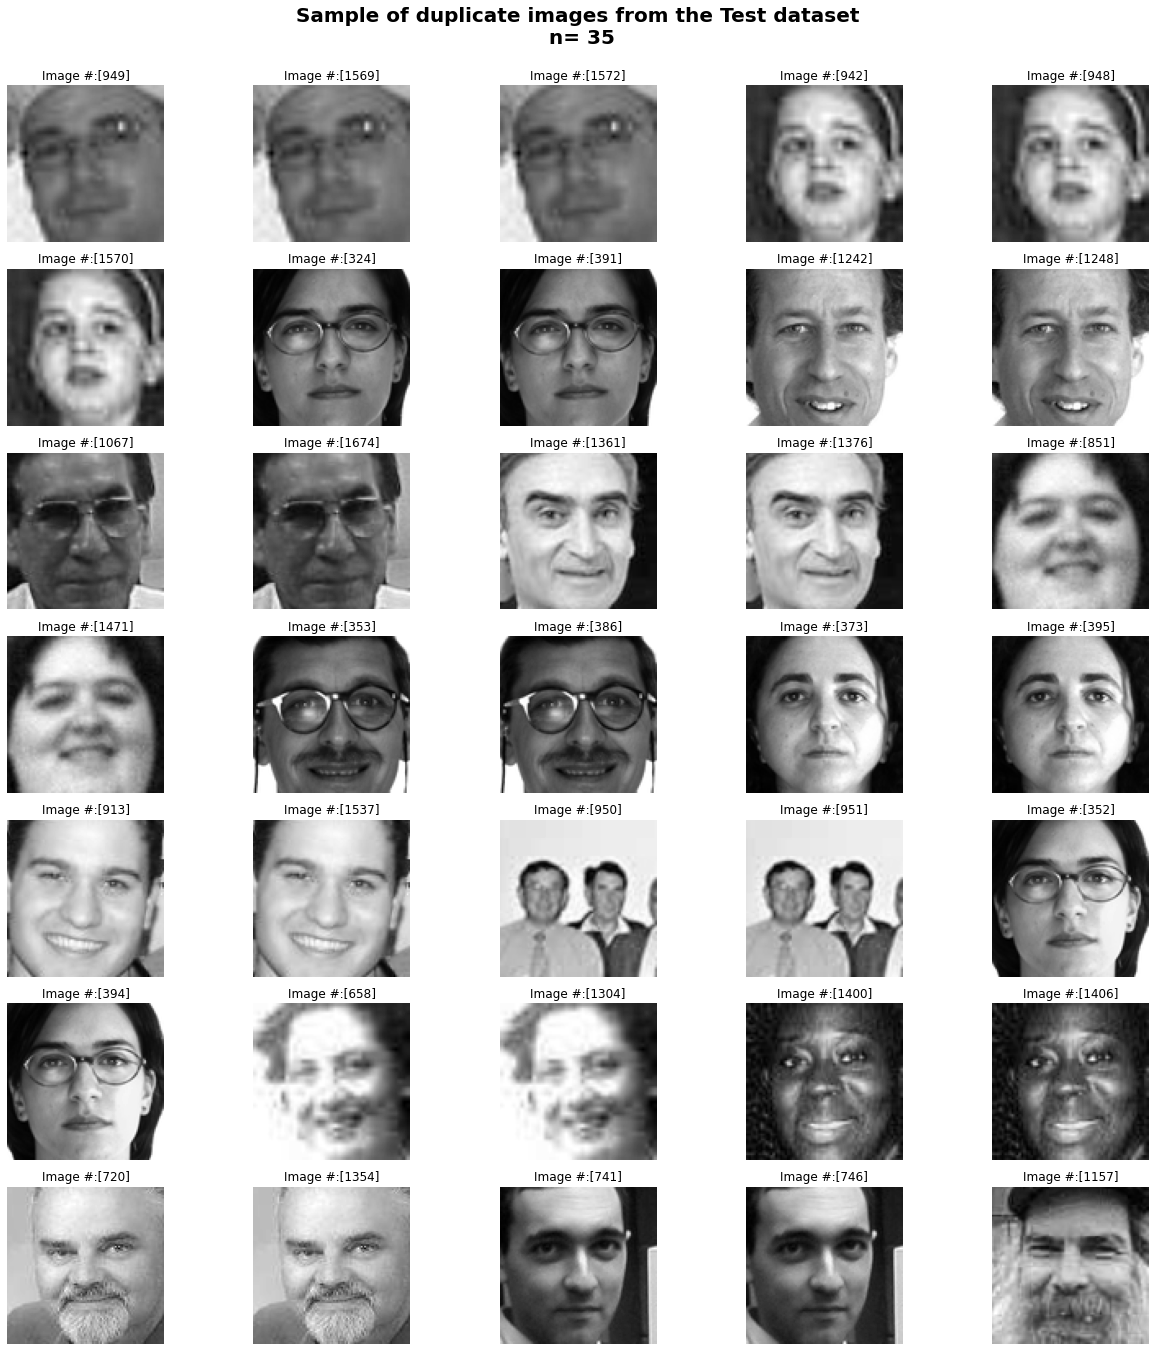

In [28]:
show_duplicate_test()

## Duplication Conclusions -EDA on duplicate data in train and test datasets:
Train:

1. The train dataset has 543 unique images out of the 1098 duplicate images from the total of 7049 images

2. Of the 1098 duplicate images:
    - 1096 of them had 4 points
    - 1 had  13 points
    - 1 had 15 points

Test:

1. The test dataset has 29 unique images out of 60 duplicate images from the total of 1783 images





In [29]:
print("Test shape is: ", test.shape)
print("Train shape is: ", train.shape)

print("Test duplicates shape is: ", test_duplicates.shape)
print("Train duplicates shape is: ", train_duplicates.shape)


Test shape is:  (1783, 3)
Train shape is:  (7049, 32)
Test duplicates shape is:  (60, 3)
Train duplicates shape is:  (1098, 3)


In [30]:
print_train_stacked()

alt.LayerChart(...)

In [31]:
print_test_stacked()

alt.LayerChart(...)

## Save the Train, Test, and duplicate files in Pickle files for easy access

In [32]:
#CODE CELL FOR JACKIE
# Pickle the dupicates datasets so we can work with them in other files. 
pickle.dump( train_duplicates, open( "data/traindup.p", "wb" ) )
pickle.dump(test_duplicates, open( "data/testdup.p", "wb" ))

train = reset_train_df()
test = reset_test_df()

#Pickle train and test so that we can jump in with cleaning this data
pickle.dump( train, open( "data/train.p", "wb" ) )
pickle.dump(test, open( "data/test.p", "wb" ))



# 3. MISSING DATA

## Detecting missing values

A lot of the data contains missing values for the keypoints columns. Let's explore how much of which columns are missing.

In [33]:
#CODE CELL FOR JOANIE
#Renaming just the training data for easy use below
train_data = df['train'].copy(deep=True)

train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.358940,37.651264,30.306152,37.976959,59.159367,37.944748,73.330421,37.706997,36.652584,37.989883,22.384529,38.033543,56.068508,29.332644,79.482887,29.734835,39.322166,29.502998,15.871188,30.428185,48.374210,62.715969,63.285725,75.970779,32.900402,76.179832,47.975414,72.919518,48.569443,78.970238
std,3.448234,3.152924,3.083226,3.033617,2.690354,2.307331,3.405852,2.881437,2.350268,2.311906,3.057122,2.910369,3.485485,3.078134,3.986226,3.773743,3.209642,3.106869,3.622533,3.865771,4.280035,5.720568,4.079063,4.579724,3.964552,4.417815,3.323060,5.222500,4.269956,5.407844
min,22.763344,1.616512,0.686592,4.091264,19.064953,27.190098,27.571878,26.250023,5.751046,26.250023,3.980117,25.123829,17.888718,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932415,22.923363,57.023258,2.245766,56.690208,12.605173,56.719044,12.536477,25.850502
25%,65.082893,35.900452,28.783339,36.327679,58.039337,36.626282,71.716507,36.085522,35.506126,36.766781,20.585810,36.534382,54.515587,27.617245,77.673920,27.667948,37.552284,27.790607,13.562183,28.206045,46.602371,59.292698,61.257141,72.875710,30.797646,73.256477,46.494572,69.396744,46.573704,75.549713
50%,66.497566,37.528053,30.251377,37.813274,59.304615,37.878040,73.247826,37.639015,36.651562,37.944077,22.535954,37.867073,56.244976,29.528873,79.784225,29.773813,39.298851,29.569347,15.785709,30.320160,48.424713,63.451420,63.178288,75.778687,32.982307,76.000595,47.905491,72.605171,48.594978,78.696320
75%,68.024750,39.258450,31.768333,39.566730,60.519810,39.260345,75.015648,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158831,81.590721,31.835621,40.917160,31.251663,17.999041,32.654766,50.330437,66.492683,65.376244,78.879120,35.101299,78.956360,49.296486,76.221649,50.677631,82.233994
max,94.689278,80.502647,85.039383,81.270912,84.440994,66.562561,95.258087,64.618233,70.714966,69.808800,61.428581,70.746796,79.787834,60.875896,94.269958,60.500298,76.582390,62.083176,58.418217,66.751328,89.438591,95.935646,84.767120,94.673637,74.017990,95.510681,83.989082,94.548355,89.438591,95.808983


In [34]:
#CODE CELL FOR JOANIE
#Creating a nicely formatted table with percentage of values missing, average value, total number missing

def print_nice_table():
    train=train_data.drop(["image"],axis=1)
    total=train.shape[0]

    nice_df=train.describe().T
    nice_df=nice_df.drop(["std","25%","50%","75%"],axis=1)
    nice_df["range"]=nice_df["max"]-nice_df["min"]
    nice_df["mean"]
    nice_df["percent_available"]=nice_df["count"]/total*100
    nice_df=nice_df.drop(["max","min"],axis=1)
    return nice_df.round(2)

In [35]:
def print_nice_plot():
    mydf = print_nice_table()

    mydf['labels'] = get_coordinate_columns()
    bars2 = alt.Chart(mydf).mark_bar().encode(
        x=alt.X('count:Q',axis=alt.Axis(title='Number of Occurrences')),
        y=alt.Y('labels:N', axis=alt.Axis(title='Labels')),
        detail='labels:N',
        color=alt.Color('labels:N', legend=None)
        ).properties(width=500, height=500)\
        .properties(title = 'Label Buckets')


    text2 = alt.Chart(mydf).mark_text(dx=20, dy=3, color='black').encode(
    x=alt.X('count:Q', stack='zero'),
        y=alt.Y('labels:N'),
        detail='labels:N',
        text=alt.Text('percent_available:Q', format='.1f')
    )

    return bars2 + text2

In [36]:
print_nice_table()

,count,mean,range,percent_available
left_eye_center_x,7039.0,66.36,71.93,99.86
left_eye_center_y,7039.0,37.65,78.89,99.86
right_eye_center_x,7036.0,30.31,84.35,99.82
right_eye_center_y,7036.0,37.98,77.18,99.82
left_eye_inner_corner_x,2271.0,59.16,65.38,32.22
left_eye_inner_corner_y,2271.0,37.94,39.37,32.22
left_eye_outer_corner_x,2267.0,73.33,67.69,32.16
left_eye_outer_corner_y,2267.0,37.71,38.37,32.16
right_eye_inner_corner_x,2268.0,36.65,64.96,32.17
right_eye_inner_corner_y,2268.0,37.99,43.56,32.17


In [37]:
print_nice_plot()

alt.LayerChart(...)

In [38]:
#CODE CELL FOR JOANIE
#How many images are missing
print("image","has",sum(train_data["image"].isna()),"missing values")
print("image","has",sum(train_data["image"].isna())/(len(train_data["image"]))*100," % of values are missing")

image has 0 missing values
image has 0.0  % of values are missing


### Missing Data Conclusions
All rows have an Image. 

Most rows have a:

* nose_tip (x, y)
* left_eye_center (x,y)
* right_eye_center (x,y)
* mouth_center_bottom_lip (x,y)

Most other features are missing from a majority of the datapoints. Some of these features are only present in ~32% of the data.

Thus, we will need to identify an approach on what to do with all of this missing data.


## Missing Test Data

In [39]:
#Dataframe for test predictions
#Each row contains an image_id and feature_name to predict
df['id_lookup']

,row_id,image_id,feature_name,location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [40]:
#Grouped by image_id, we can see how many images require how many features to be predicted
grouped = df['id_lookup'].groupby("image_id")['feature_name'].agg('count')
grouped

image_id
1       30
2       30
3       30
4       30
5       30
        ..
1779     8
1780     8
1781     8
1782     8
1783     8
Name: feature_name, Length: 1783, dtype: int64

In [41]:
#We can print the counts to see that most images in the test only require 8 keypoints to predict
temp = pd.DataFrame(grouped.value_counts()).rename(columns={'feature_name':'count'})
temp.index.name = 'num_features'
temp

,count
num_features,
8,1190
30,556
28,18
26,9
24,3
22,2
20,2
6,2
18,1


In [42]:
#We can print the number of images in test that require each feature to be predicted
groupby_features = df['id_lookup'].groupby('feature_name')['image_id'].agg('count')
new_df = pd.DataFrame(groupby_features).reset_index()
new_df = new_df.rename(columns={'image_id':'count'})
new_df["percent_available"]=new_df["count"]/np.max(new_df['count'])*100
new_df=np.round(new_df,2)
new_df

,feature_name,count,percent_available
0,left_eye_center_x,1782,99.94
1,left_eye_center_y,1782,99.94
2,left_eye_inner_corner_x,588,32.98
3,left_eye_inner_corner_y,588,32.98
4,left_eye_outer_corner_x,589,33.03
5,left_eye_outer_corner_y,589,33.03
6,left_eyebrow_inner_end_x,585,32.81
7,left_eyebrow_inner_end_y,585,32.81
8,left_eyebrow_outer_end_x,574,32.19
9,left_eyebrow_outer_end_y,574,32.19


In [43]:
def print_nice_plot():
    mydf = new_df

    mydf['labels'] = list(new_df['feature_name'])
    bars2 = alt.Chart(mydf).mark_bar().encode(
        x=alt.X('count:Q',axis=alt.Axis(title='Number of Occurrences')),
        y=alt.Y('labels:N', axis=alt.Axis(title='Labels')),
        detail='labels:N',
        color=alt.Color('labels:N', legend=None)
        ).properties(width=500, height=500)\
        .properties(title = 'Label Buckets')


    text2 = alt.Chart(mydf).mark_text(dx=20, dy=3, color='black').encode(
    x=alt.X('count:Q', stack='zero'),
        y=alt.Y('labels:N'),
        detail='labels:N',
        text=alt.Text('percent_available:Q', format='.1f')
    )

    return bars2 + text2

In [44]:
#list(new_df['feature_name'])
print_nice_plot()

alt.LayerChart(...)

# Potential Approach for missing data
# Filling In Missing Data Using Linear-Models

Notes:

* 'y' : An incomplete feature in the data set which is being augmented

* 'X' : a collection of features which are dense in data and are highly-correlated to 'y'.

* Features which have no more than 50-missing data-points are considered `Dense`. Features which have no missing-data-points are considered `full`.

* Augmentation considers atleast 2-reference points which are `significantly correlated` to augment any feature; this is to have a `triangulation` in the image rather than just depend on one point.

* Correlations of more than 0.5 are considered as `significant correlations`. The corresponding-features are earmarked to be used to triangulate a predicted location.

* Data-points which are full in ('X' and 'y') are used to train the corresponding linear-model.

* Data-points which are full in 'X' but empty in 'y' are augmented by this model.

* This augmentation was possible by setting the acceptable accuracy (R^2) of the linear-models generated to a minimum-acceptable-score of 45% accurate.. any higher than this and the augmentation does not converge; for a few features, the models that came up were less than 50% accurate.


In [45]:
#CODE CELL FOR RAKESH



# Fetch the most significantly-correlated features for each feature in the `data_under_cleansing` set.
def get_feature_correlations(data_under_cleansing):
    correlations = data_under_cleansing.corr()
    max_correlations = correlations[(correlations>0.5) & (correlations<1)]
    feature_corrs = {}
    for column in max_correlations:
        corr_scores = max_correlations[column]
        significant_correlations = corr_scores.dropna()
        feature_corrs[significant_correlations.name]=significant_correlations
    return feature_corrs


# In the data set `data_under_cleaning`, this method looks for features which do not have more than 50 missing data-values.
# returns a bool-mask representing : <feature> :: <bool? is data dense>
def get_data_density_mask(data_under_cleansing):
    features = data_under_cleansing.columns
    data_under_cleansing_mask = {}
    for i in features:
        missing_count = sum(data_under_cleansing[i].isna())
        data_under_cleansing_mask[i] = missing_count<50
    return data_under_cleansing_mask

# Method to run the augmentation on given data.
def do_augment_missing_data(data_under_cleansing, density_mask, plot_correlations):
    feat_corrs = get_feature_correlations(data_under_cleansing)
    print("Complete Features: ", len([key for key in density_mask.keys() if density_mask[key]]))

    #all feature-correlations for features which are reported as not dense
    all_features_to_augment = [feat_corrs[feature] for feature in density_mask if not density_mask[feature]]

    for feature_data in all_features_to_augment:
        # Do this for each feature that needs to be augmented due to large missing values
        feat_to_be_augmented = feature_data.name
        
        high_corr_full_features = [feat for feat in feature_data.index.tolist() if density_mask[feat]]
        if len(high_corr_full_features) < 2:
            # a feature_threshold to identify how many features are to be used to model 
            # feature being augmented. Minimum is 2.
            continue
        
        print("\nfeat ..", feat_to_be_augmented)
        print("corr ..", high_corr_full_features)

        #"filtering train-data set where all high-corr-features and feat-to-be-augmented are not-NA"
        query_str_train = ' & '.join(['~{}.isna()'.format(k) for k in high_corr_full_features])
        query_str_train = ' & '.join([query_str_train, '~{}.isna()'.format(feat_to_be_augmented)])
        #print(query_str_train)
        tmp_train_data  = data_under_cleansing.query(query_str_train,engine="python")
        tmp_train_X = tmp_train_data[high_corr_full_features]
        tmp_train_y = tmp_train_data[feat_to_be_augmented]
        
        if plot_correlations:
            print("Plotting y against each X.... \n\n ")
            for x in high_corr_full_features:
                tmp_train_data.plot(x=x, y=feat_to_be_augmented, style='o')
                plt.show()

        #"filtering predict-data set where all high-corr-features are not-NA and feat-to-be-augmented are NA"
        query_str_predict = ' & '.join(['~{}.isna()'.format(k) for k in high_corr_full_features])
        query_str_predict = ' & '.join([query_str_predict, '{}.isna()'.format(feat_to_be_augmented)])
        
    
        tmp_predict_data  = data_under_cleansing.query(query_str_predict,engine="python")
        tmp_predict_X = tmp_predict_data[high_corr_full_features]

        lm = LinearRegression().fit(tmp_train_X, tmp_train_y)
        model_score =  lm.score(tmp_train_X, tmp_train_y)
        print("Model score: ", model_score)
        if model_score < 0.45:
            # do not use a model to augment data when model is less than 45% accurate. Shifting this threshold to 50% leads to NON-CONVERGENCE
            print("aborting augmenting..")
            continue

        print("Model coef: " , lm.coef_)
        tmp_predict_y = list(lm.predict(tmp_predict_X))
        feat_column_index = data_under_cleansing.columns.get_loc(feat_to_be_augmented)
        index_list = tmp_predict_data.index.tolist()

        for i, index in enumerate(index_list):
            data_under_cleansing.iloc[index][feat_column_index] = tmp_predict_y[i]

    return data_under_cleansing


def augment_missing_data(given_dataset, plot_correlations=False):
    '''
    Utility Method which takes a data set of size `n` with `m`-features and augments 
    features which are missing using linear-regression models. There is not guarantee that 
    this augmentation process will converge for all data-sets. But it is known to work for the train-data
    from this project.
    '''
    data_to_be_cleansed = given_dataset.loc[:, given_dataset.columns != 'Image']
    
    while True:
        print("\n\n==========================================================")
        data_density_mask = get_data_density_mask(data_to_be_cleansed)
        incomplete_features = [key for key in data_density_mask.keys() if not data_density_mask[key]]
        print("Incomplete Features: ", len(incomplete_features))
        if len(incomplete_features) > 0:
            data_to_be_cleansed = do_augment_missing_data(data_to_be_cleansed, data_density_mask, plot_correlations)
        else:
            break
    
    return data_to_be_cleansed

#### Heat Maps for Augmented Train-Data

Notes:
* These are the heat-maps of correlation before and after augmentation

* From the heat map it looks like the augmentation did not do anything drastic to the data.

* Linear Modelling Augmentation seemed to have boosted correlations of features, already correlated features became more correlated and feature-pairs which werent highly correlated seemed to not have changed much.

In [46]:
#CODE CELL FOR RAKESH

## Pass in the right data-set to augment and get the augmented data back (filtering 'image' column here)
augmented_data = augment_missing_data(train_data.loc[:, train_data.columns != 'image'])




Incomplete Features:  22
Complete Features:  8

feat .. left_eye_inner_corner_y
corr .. ['left_eye_center_y', 'right_eye_center_y']
Model score:  0.8865244078584265
Model coef:  [0.7699128  0.16635725]

feat .. right_eye_inner_corner_y
corr .. ['left_eye_center_y', 'right_eye_center_y']
Model score:  0.8825467428834498
Model coef:  [0.17223588 0.7706793 ]

feat .. right_eye_outer_corner_y
corr .. ['right_eye_center_y', 'mouth_center_bottom_lip_x']
Model score:  0.9187057114361991
Model coef:  [1.0600798  0.11528283]

feat .. left_eyebrow_inner_end_x
corr .. ['left_eye_center_x', 'nose_tip_x']
Model score:  0.5503262588494366
Model coef:  [0.6303646 0.3357795]

feat .. right_eyebrow_inner_end_x
corr .. ['right_eye_center_x', 'nose_tip_x']
Model score:  0.45514743643069183
Model coef:  [0.5811892  0.28830072]

feat .. mouth_center_top_lip_x
corr .. ['nose_tip_x', 'mouth_center_bottom_lip_x']
Model score:  0.9620570323755809
Model coef:  [0.10229428 0.8275127 ]


Incomplete Features:  1

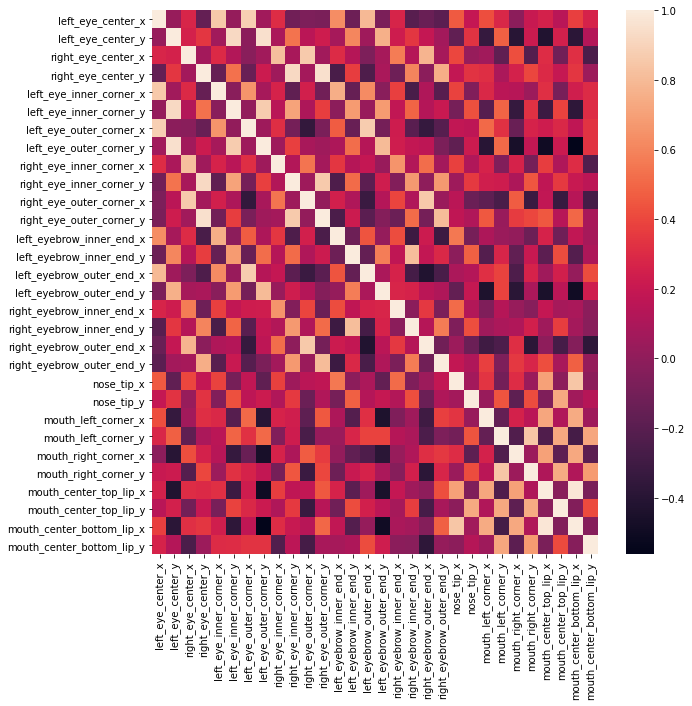

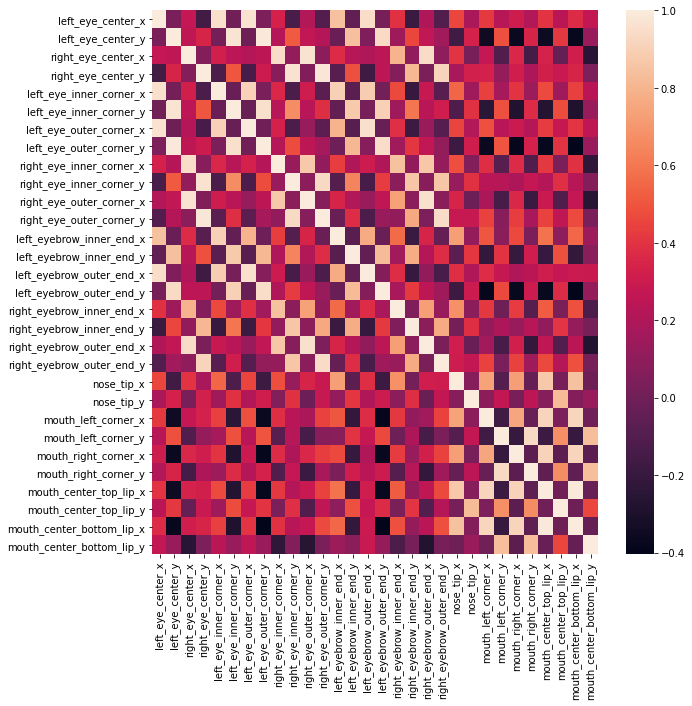

In [47]:
#CODE CELL FOR RAKESH
## Plot correlation-map of pre-augmentation data.
fig1, ax1 = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(),ax=ax1)

## Plot correlation-map of post-augmentation data.
fig2, ax2 = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(augmented_data.corr(),ax=ax2)

# 4. OUTLIERS


## Evaluating the data we do have

Let's see what happens if we plot all of a single keypoint values on a single image. Will they fall in the same place? Since most rows have these 4 columns, we will plot these only: nose_tip (x, y) left_eye_center (x,y) right_eye_center (x,y) mouth_center_bottom_lip (x,y)

In [48]:
#CODE CELL FOR JOANIE

#copy of data
train_copy=train_data.copy(deep=True)
train=train_data.drop(["image"],axis=1).copy()

#function that takes an index and returns the nicely formatted image
def fix_image(image_index, train_copy = train_copy):    
    return np.array(train_copy['image'][image_index],dtype="int").reshape(96,96)


In [49]:
#CODE CELL FOR JOANIE

def plot_left_eye(first_image):
    fig, ax = plt.subplots(figsize=(7,7)) 
    plt.imshow(first_image, cmap = 'gray')
    plt.scatter(x=train_data["left_eye_center_x"],y=train_data["left_eye_center_y"],color="red",marker="+")

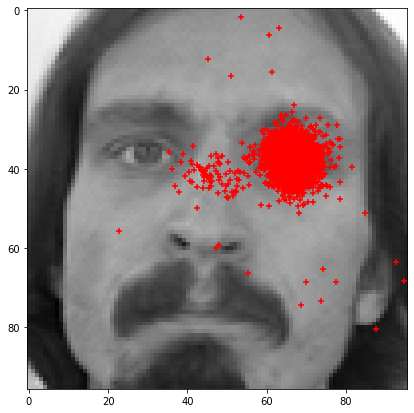

In [50]:
plot_left_eye(fix_image(0))

In [51]:
#CODE CELL FOR JOANIE

def plot_right_eye(first_image):
    fig, ax = plt.subplots(figsize=(7,7)) 
    plt.imshow(first_image.reshape(96,96), cmap = 'gray')
    plt.scatter(x=train_data["right_eye_center_x"],y=train_data["right_eye_center_y"],color="blue",marker="+")

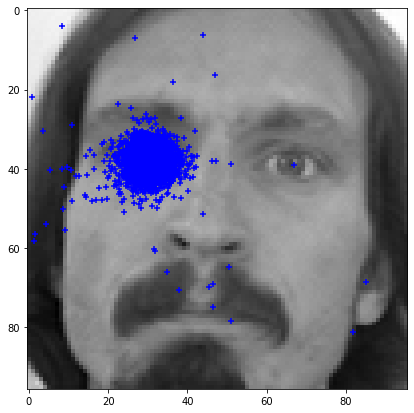

In [52]:
plot_right_eye(fix_image(0))

### Conclusions
We can see that with both of the left and right eye center keypoints, most of the data falls in a big cluster around where the guy above's eyes are, or where we'd expect most of the data to fall. It is a little troubling to see some eye centers in the corners or where the guy above's mouth is. These could be outliers we want to remove.

In [53]:
#CODE CELL FOR JOANIE
def plot_nose(first_image):
    fig, ax = plt.subplots(figsize=(7,7)) 
    plt.imshow(first_image.reshape(96,96), cmap = 'gray')
    plt.scatter(x=train_data["nose_tip_x"],y=train_data["nose_tip_y"],color="green",marker="+")

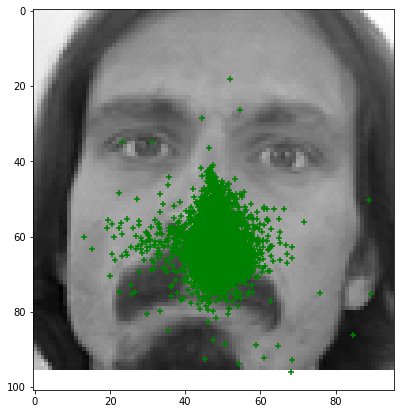

In [54]:
plot_nose(fix_image(0))

In [55]:
#CODE CELL FOR JOANIE
def plot_mouth(first_image):
    fig, ax = plt.subplots(figsize=(7,7)) 
    plt.imshow(first_image.reshape(96,96), cmap = 'gray')
    plt.scatter(x=train_data["mouth_center_bottom_lip_x"],y=train_data["mouth_center_bottom_lip_y"],color="purple",marker="+")

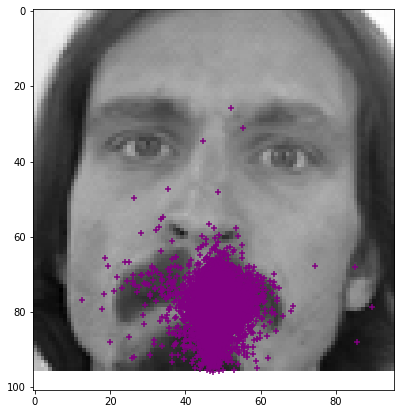

In [56]:
plot_mouth(fix_image(0))

### Conclusions
We can see that for the nose tip and mouth center, most of the data falls in a cluster around the guy's nose and mouth but there are several points that appear in weird positions: unexpectedly high up, in the corners, at the border of the image, etc.

## Evaluating some of these outliers
First, we'll draw some images with the left eye is much lower than average.

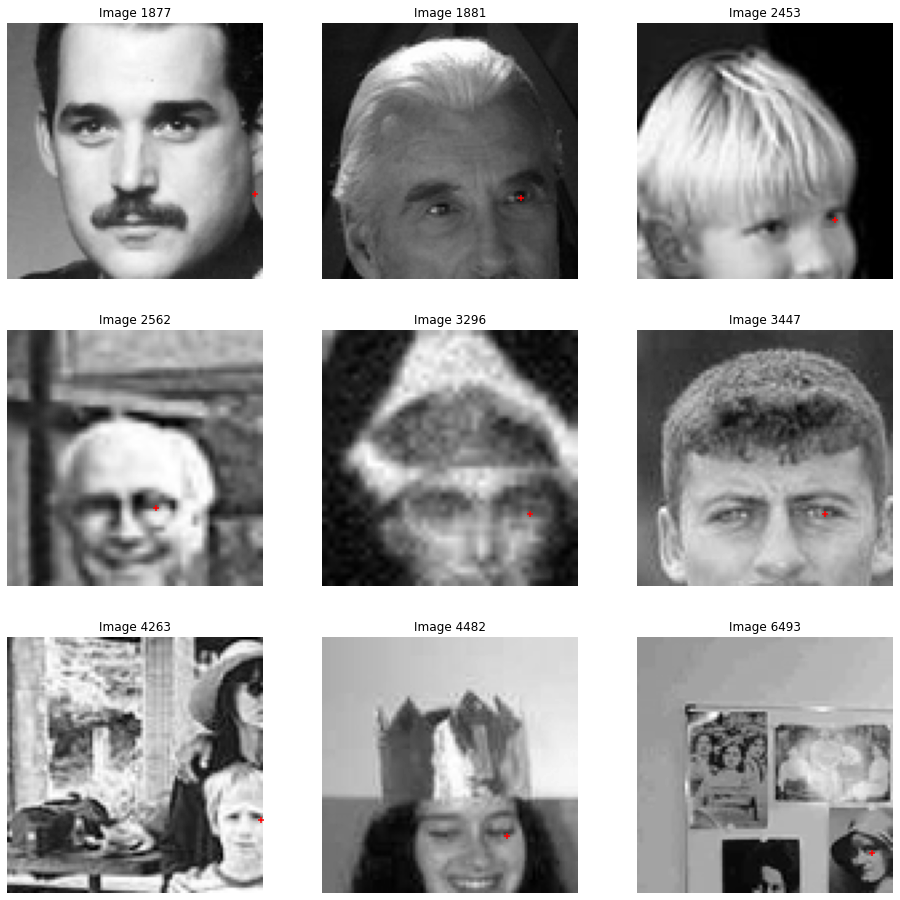

In [57]:
#CODE CELL FOR JOANIE

#These are images where the left eye was much lower than average
indices=np.where((train_data["left_eye_center_y"]>60) | (train_data["left_eye_center_y"]>60))[0]
fig, axs = plt.subplots(3,3,figsize=(16,16)) 
index=1
axes=axs.flatten()
for i in indices:
    ax=axes[index-1]
    ax.axis('off')
    ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')
    ax.scatter(train_data["left_eye_center_x"][i],train_data["left_eye_center_y"][i],color="red",marker="+")
    ax.set_title("Image "+str(i))
    index+=1
plt.show()

We can see that the reason some of the eyes are so low is that the faces are positioned low on screen. We can also see one image is mislabelled and one is a collage of images on the wall.

## Systematic Identification of Outliers
It will be tedious to manually look through all of the images so let's just look at images we consider outliers. Here we will consider outliers images that have a keypoint greater than 3 times the standard deviation away from the mean.

In [58]:
#CODE CELL FOR JOANIE

#This block is identifying and counting all outliers
#Outliers are images that contain keypoints > 3std from mean
def find_outliers():
    #train=train_data.drop(["image"],axis=1).copy()
    described_train=train.describe().T
    std=described_train["std"]
    mean=described_train["mean"]
    q1=described_train["25%"]
    q3=described_train["75%"]
    iqr=q3-q1

    #If we define outliers using IQR
    #outlier_low=q1-1.5*iqr
    #outlier_high=q3+1.5*iqr

    #If we define outliers using std
    outlier_low=mean-3*std
    outlier_high=mean+3*std



    #Keep track of these images in a list
    outlier_images=[]
    outlier_dict={}

    #Iterate through the data to find outliers based on whether they are lower/higher than defined outlier boundaries
    for col in train.columns:
        indices=list(np.where((train[col] < outlier_low[col]) | (train[col] > outlier_high[col]))[0])
        outlier_images.extend(indices)
        for i in indices:
            temp=outlier_dict.get(i,[])
            temp.append(col[:-1])
            outlier_dict[i]=temp

    #Only count each index once
    outliers=np.unique(outlier_images)
    outliers
    print("Finding points 3 standard deviations away from the mean results in ",len(outliers),
        "images being classified as outliers")
    print("This represents",len(outliers)/train.shape[0]*100,"% of our total data")

    print(train.shape)
    
    return outliers,outlier_dict


In [59]:
#CODE CELL FOR JOANIE
outliers, outlier_dict = find_outliers()
print("Finding points 3 standard deviations away from the mean results in ",len(outliers),
      "images being classified as outliers")
print("This represents",len(outliers)/train.shape[0]*100,"% of our total data")

Finding points 3 standard deviations away from the mean results in  409 images being classified as outliers
This represents 5.802241452688325 % of our total data
(7049, 30)
Finding points 3 standard deviations away from the mean results in  409 images being classified as outliers
This represents 5.802241452688325 % of our total data


In [60]:
#CODE CELL FOR JOANIE
#Finding the unique column name strings without the x/y coords at the end
def get_unique_columns():
    column_strings=[i[:-1] for i in train.columns]
    unique_columns=np.unique(column_strings)
    return unique_columns

unique_columns = get_unique_columns()

In [61]:
#CODE CELL FOR JOANIE
#Plot the outliers from above
def plot_outliers(outliers,outlier_dict):
    fig, axs = plt.subplots(round(len(outliers)/3)+1,3,figsize=(20,400)) 
    index=1
    axes=axs.flatten()
    for i in outliers:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')

        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            #Color facepoints red if outlier
            if column_string in outlier_dict[i]:
                ax.scatter(train_data[x][i],train_data[y][i],color="red",marker="+")
            #Otherwise color blue
            else:
                ax.scatter(train_data[x][i],train_data[y][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

In [ ]:
plot_outliers(outliers,outlier_dict)

### Conclusions

* As we identified earlier, there are duplicates but also the same person is duplicated with slightly different facial expressions, zoom-ins, or camera angles.
* There are distracting things in the images such as: sunglasses or glasses, hats, moustaches, eyes closed/squinting, face cut off from one side, mouth really close to/at edge, faces are angled, sometimes so much that you are missing an eye due to the angle. Some are blurry/grainy photos. 
* Some photos are cartoons. Some photos are babies.
* Image 1620 is missing an eye/super angled
* Image 2075 is a zoomed version of 2063
* These images look mislabelled: 1747, 1877, 1907, 2175, 2199,
* Image 2430, 3697 is a cartoon/artwork
* Image 2462, 2831 is a baby
* 6492 and 6493 are duplicates but with different labels
* Image 92, 109, 113, 143, 178, 272, 309, 329, 368, 384, 430, 434, 466, 488, 493, 503, 529, 530, 583, 625, 648, 759, 829, 907, 911, 1068 are the same person
* Image 2482, 2438, 2372, 3938, 4315 are really blurry

In [ ]:
#CODE CELL FOR JOANIE
#Plotting some interesting photos

def plot_interesting(photo_ids):
    fig, axs = plt.subplots(3,3,figsize=(15,15)) 
    index=1
    axes=axs.flatten()
    for i in photo_ids:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')

        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            #Color facepoints blue
            ax.scatter(train[x][i],train[y][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

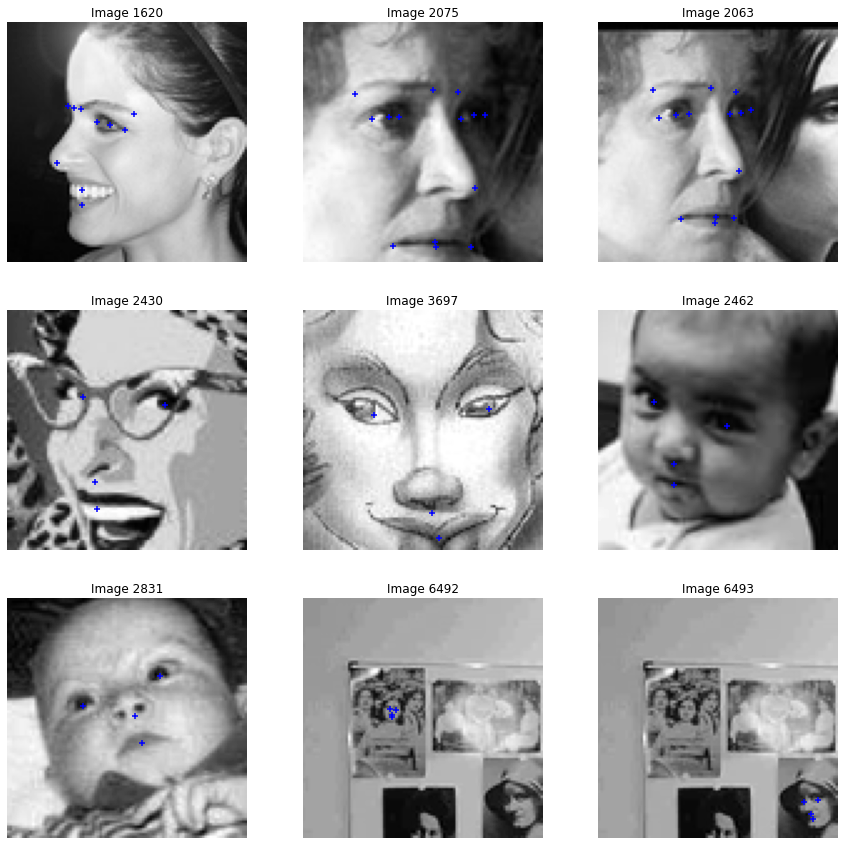

In [ ]:
photo_ids=[1620,2075,2063,2430,3697,2462,2831,6492,6493]
plot_interesting(photo_ids)

In [ ]:
#CODE CELL FOR JOANIE
#Some of the images are the same person with different expressions or lighting
# There are other images that meet this bucket but not as many of the same person
def plot_same(same):
    fig, axs = plt.subplots(7,4,figsize=(20,20)) 
    index=1
    axes=axs.flatten()
    for i in same:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')

        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            #Color facepoints blue
            ax.scatter(train[x][i],train[y][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

26


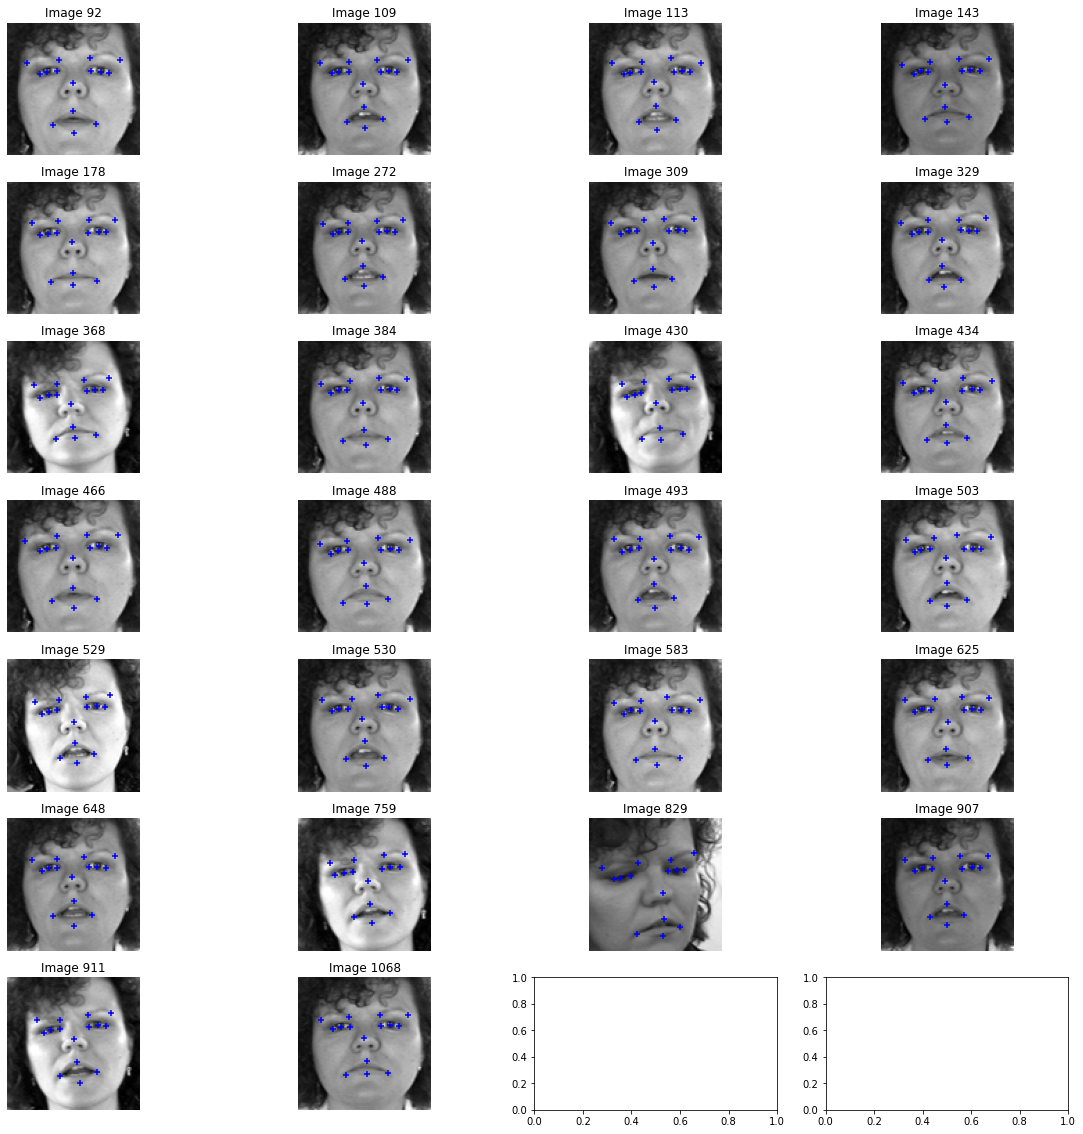

In [ ]:
same = [92, 109, 113, 143, 178, 272, 309, 329, 368, 384, 430, 434, 466, 488, 493, 503,
        529, 530, 583, 625, 648, 759, 829, 907, 911, 1068]
print(len(same))
plot_same(same)

In [ ]:
#CODE CELL FOR JOANIE
#These images looks mislabelled
miss=[1747, 1877, 1907,2199]

def plot_mislabelled(miss):
    fig, axs = plt.subplots(2,2,figsize=(12,12)) 
    index=1
    axes=axs.flatten()
    for i in miss:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i).reshape(96,96), cmap = 'gray')

        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            #Color facepoints blue
            ax.scatter(train[x][i],train[y][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

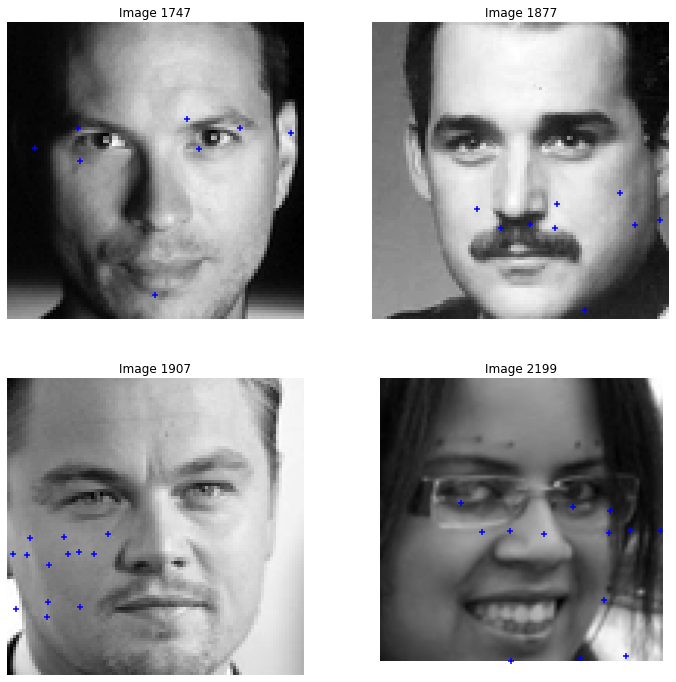

In [ ]:
plot_mislabelled(miss)

### Conclusions
We definitely want to remove these mislabelled images and may want to remove some or all of the other outliers. Especially the cartoons or the collage images.

## Exploring Potential Transformations

We may be able to improve our data set with additional transformations. For example, we could flip the images and include them in our set.

Below, we will explore potential transformations we could take on our training data.

In [ ]:
train_1 = df['train'].copy()
train_2 = train_1.copy()

In [ ]:
transform_data = TransformData()

### Horizontal Flip

In [ ]:
flipped = transform_data.FlipHorizontal(train_2,verbose=True)
flipped

In [ ]:
flipped.describe()
#Only 2140 for each point because flipped only works on the good data (i.e. no NAs per row)

In [ ]:
def plot_transform_eyes(train1, train2):
    indices=range(0,5)
    fig, axs = plt.subplots(5,2,figsize=(10,20)) 
    index=1
    axes=axs.flatten()
    for i in indices:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i,train1).reshape(96,96), cmap = 'gray')
        ax.scatter(x=train1["left_eye_center_x"][i],y=train1["left_eye_center_y"][i],color="red",marker="+")
        ax.scatter(x=train1["right_eye_center_x"][i],y=train1["right_eye_center_y"][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i,train2).reshape(96,96), cmap = 'gray')
        ax.scatter(x=train2["left_eye_center_x"][i],y=train2["left_eye_center_y"][i],color="red",marker="+")
        ax.scatter(x=train2["right_eye_center_x"][i],y=train2["right_eye_center_y"][i],color="blue",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

In [ ]:
def plot_transform_all(train1, train2):
    indices=range(0,5)
    fig, axs = plt.subplots(5,2,figsize=(10,20)) 
    index=1
    axes=axs.flatten()
    for i in indices:
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i,train1).reshape(96,96), cmap = 'gray')
        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            ax.scatter(train1[x][i],train1[y][i],color="red",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
        ax=axes[index-1]
        ax.axis('off')
        ax.imshow(fix_image(i,train2).reshape(96,96), cmap = 'gray')
        for column_string in unique_columns:
            x=column_string+"x"
            y=column_string+"y"
            ax.scatter(train2[x][i],train2[y][i],color="red",marker="+")
        ax.set_title("Image "+str(i))
        index+=1
    plt.show()

In [ ]:
#Plotting flipped images
plot_transform_eyes(train_1,flipped)

In [ ]:
#Plotting flipped images
plot_transform_all(train_1,flipped)

### Bright Dim

In [ ]:
bright = transform_data.Bright_Dim(train_2,level_of_brightness = .01)

In [ ]:
dim = transform_data.Bright_Dim(train_2,level_to_dim=.01)

In [ ]:
dim.iloc[7049:,:]

In [ ]:
#Plotting bright/dim images
#Dimmed images get appended to the end
plot_transform_eyes(train_1,dim.iloc[7049:,:].reset_index())

In [ ]:
#Plotting bright/dim images
plot_transform_eyes(train_1,bright)

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR RAKESH

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP

In [ ]:
#CODE CELL FOR SANDIP